In [1263]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [1264]:
sns.set_theme()

In [1265]:
data = pd.read_excel('homicidios.xlsx')

In [1266]:
data.head()

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


## Detección de Valores Faltantes

In [1267]:
data.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [1268]:
data[data['Cruce'].isnull()].shape

(171, 21)

In [1269]:
data[(data['Cruce'].isnull()) & (data['TIPO_DE_CALLE'] == 'AUTOPISTA')].shape

(39, 21)

Vemos que la colummna Altura 567 valores nulos lo cual es el 80%. Así mismo, al revisar la columna cruce vemos que tiene 171 valores nulos pero la suma de valores nulos en Altura y Cruce nos da el 100% de las filas. Con lo anterior podemos asumir que los valores nulos de la columa Altura fueron sucesos que ocurrieron en un cruce de calles avenidas o autopistas, así como también se puede decir que los valores nulos de la columna cruce hace referencia a los sucesos que no ocurrieron en cruces.

Eliminamos las columnas AAAA MM DD dado que la información ya la tenemos en la columna FECHA

In [1270]:
data.drop(columns=['AAAA', 'MM', 'DD'], inplace= True)

In [1271]:
data['HORA']

0      04:00:00
1      01:15:00
2      07:00:00
3      00:00:00
4      05:20:00
         ...   
691    17:10:00
692    01:10:00
693    00:43:00
694    10:30:00
695    06:10:00
Name: HORA, Length: 696, dtype: object

In [1272]:
data.head(2)

,ID,N_VICTIMAS,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [1273]:
# Importamos la información de victimas
data_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')

In [1274]:
data_victimas.head(3)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


In [1275]:
data_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


In [1276]:
# Eliminamos las columnas AAAA MM DD dado que la información ya está en la columna fecha
data_victimas.drop(columns= ['AAAA', 'MM', 'DD'], inplace= True)

In [1277]:
data_victimas.iloc[3,6]

'SD'

In [1278]:
data_victimas[data_victimas.FECHA_FALLECIMIENTO == 'SD'].head(3)

,ID_hecho,FECHA,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
3,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18,SD
16,2016-0022,2016-02-21,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,41,SD
19,2016-0027,2016-02-28,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,34,SD


In [1279]:
# Reemplazamos el nombre de la columna ID_hecho 
data_victimas.rename(columns={'ID_hecho':'ID'}, inplace= True)

In [1280]:
# Hacemos un merge de los dos dataframes para trabajar con uno solo
data = pd.merge(data, data_victimas, on= 'ID', how = 'inner')

In [1281]:
data.head(3)

,ID,N_VICTIMAS,FECHA_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,PIEDRA BUENA AV.,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",...,-34.68757022,MOTO-AUTO,MOTO,AUTO,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DE LOS CORRALES AV.,...,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,1,2016-01-03,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,2034.0,NaN,...,-34.63189362,MOTO-AUTO,MOTO,AUTO,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00


In [1282]:
# Detectamos que los valores que no tienen información están con lass letras 'SD' por lo que se reemplazan por nulos
data[data.EDAD == 'SD'].head(3)

,ID,N_VICTIMAS,FECHA_x,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2,2016-03-29,11:00:00,11,AV DIRECTORIO Y RIVERA INDARTE,AVENIDA,DIRECTORIO AV.,NaN,RIVERA INDARTE AV.,...,-34.63350444,MOTO-CARGAS,MOTO,CARGAS,2016-03-29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,1,2016-04-11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DEL LIBERTADOR AV.,...,-34.53476874,MOTO-SD,MOTO,SD,2016-04-11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,1,2016-04-15,17:40:00,17,AV. CORRIENTES Y AV. DORREGO,AVENIDA,CORRIENTES AV.,NaN,DORREGO AV.,...,-34.59170240,PEATON-PASAJEROS,PEATON,PASAJEROS,2016-04-15,PEATON,PEATON,FEMENINO,SD,SD


In [1283]:
# Reemplazamos los valores que tienen SD por valores nulos
data.replace('SD', np.nan, inplace=True)

In [1284]:
data.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'HORA', 'HH', 'LUGAR_DEL_HECHO',
       'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce', 'Dirección Normalizada',
       'COMUNA', 'XY (CABA)', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA_x',
       'ACUSADO', 'FECHA_y', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [1285]:
#Eliminamos las columas duplicadas y la de Participantes dado que la información está en la columna Victima y Acusado
data.drop(columns=['FECHA_y', 'VICTIMA_y'], inplace= True)

In [1286]:
# Renombramos las columas definitivas 
data.rename(columns={'FECHA_x':'FECHA', 'VICTIMA_x':'VICTIMA'}, inplace= True)

In [1287]:
#Eliminamos las columas duplicadas
data.drop(columns=['PARTICIPANTES'], inplace= True)

In [1288]:
# Revisamos nuevamente la información que tenemos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   HORA                   716 non-null    object        
 4   HH                     716 non-null    float64       
 5   LUGAR_DEL_HECHO        716 non-null    object        
 6   TIPO_DE_CALLE          717 non-null    object        
 7   Calle                  716 non-null    object        
 8   Altura                 133 non-null    float64       
 9   Cruce                  540 non-null    object        
 10  Dirección Normalizada  708 non-null    object        
 11  COMUNA                 717 non-null    int64         
 12  XY (CABA)              717 non-null    object        
 13  pos x

In [1289]:
# tenemos 23 celdas sin información de acusados
data.loc[data['ACUSADO'].isnull()].head(3)

,ID,N_VICTIMAS,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
3,2016-0004,1,2016-01-10,00:00:00,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,LARRAZABAL AV.,NaN,"VILLEGAS, CONRADO, GRAL.",...,8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO,NaN,CONDUCTOR,MASCULINO,18.0,NaN
33,2016-0045,1,2016-04-11,10:25:00,10.0,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,"PAZ, GRAL. AV.",NaN,DEL LIBERTADOR AV.,...,13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO,NaN,CONDUCTOR,MASCULINO,NaN,NaN
36,2016-0049,1,2016-04-17,00:00:00,0.0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,NaN,NaN,...,4,Point (. .),-58.37714647568196,-34.63657525428238,NaN,NaN,NaN,NaN,NaN,NaN


In [1290]:
# Completamos informmación con el string 'SIN ACUSADO'
data['ACUSADO'].fillna('SIN ACUSADO', inplace= True)

In [1291]:
data.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
HORA                       1
HH                         1
LUGAR_DEL_HECHO            1
TIPO_DE_CALLE              0
Calle                      1
Altura                   584
Cruce                    177
Dirección Normalizada      9
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
VICTIMA                    9
ACUSADO                    0
ROL                       11
SEXO                       6
EDAD                      53
FECHA_FALLECIMIENTO       68
dtype: int64

In [1292]:
# Completamos el valor faltante de la hora con la hora de fallecimiento
data['HORA'].fillna(0, inplace= True)
data['HH'].fillna(0, inplace= True)

In [1293]:
data[data['LUGAR_DEL_HECHO'].isna()]

,ID,N_VICTIMAS,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Altura,Cruce,...,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
121,2016-0151,1,2016-11-18,20:35:00,20.0,NaN,CALLE,NaN,NaN,NaN,...,0,Point (. .),.,.,PEATON,SIN ACUSADO,PEATON,NaN,NaN,NaN


In [1294]:
# Eliminamos la fila que tiene mas del 50% de la información nula
data.dropna(subset=['LUGAR_DEL_HECHO'], inplace=True)

## Tratamiento de Valores Faltantes

In [1295]:
data.isna().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      0
Altura                   583
Cruce                    176
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
VICTIMA                    9
ACUSADO                    0
ROL                       11
SEXO                       5
EDAD                      52
FECHA_FALLECIMIENTO       67
dtype: int64

Para facilitar el análisis reemplazamos el detalle del cruce donde se generó el evento por el texto 'En Cruce' haciendo referencia a que el sinniestro se generó en un cruce y teniendo en cuenta que la información específica se encuentra en la columna 'Dirección'

In [1296]:
# Reemplazar los valores no nulos en la columna 'Cruce' por 'En Cruce'
data['Cruce'].mask(data['Cruce'].notnull(), 'En Cruce', inplace=True)

Reemplazamos los valores faltantes de la columna 'Cruce' con el texto 'No Cruce' haciendo alución a que el evento sucedió a lo largo de una avenida calle o autopísta

In [1297]:
data['Cruce'].fillna('No Cruce', inplace= True)

In [1298]:
data['Cruce'].value_counts()

Cruce
En Cruce    540
No Cruce    176
Name: count, dtype: int64

Eliminamos la columna Altura dado que es una información muy específica y ya la tenemos en la dirección e igualmente hace referencia a los eventos que no sucedieron en un cruce, lo cual ya está tomado en consideración en la columna Cruce

In [1299]:
data.drop(columns=['Altura'], inplace= True)

In [1300]:
# Reemplazamos los valores nulos de la columna dirección normalizada por los de la columna Dirección Normalizada
data['Dirección Normalizada'].fillna(data['LUGAR_DEL_HECHO'], inplace=True)

In [1301]:
# Completamos los nulos de la columna edad por el promedio de dicha columna
data['EDAD'].fillna(data['EDAD'].mean(), inplace= True)

In [1302]:
# Transformamos la columna en tipo entero
data['EDAD'] = data['EDAD'].astype(int)

In [1303]:
# Completamos los nulos de la columna SEXO con el texto SIN INFORMACIÓN
data['SEXO'].fillna('SIN INFORMACIÓN', inplace= True)

In [1304]:
# Tenemos 7 valores nulos en la fila ROL, por lo que asumimos que para estos casos el rol es igual a la victima
data['ROL'].fillna(data['VICTIMA'], inplace= True)

In [1305]:
# Completamos los nulos de la columna VICTIMA Y ROL con el texto SIN INFORMACIÓN
data['VICTIMA'].fillna('SIN INFORMACIÓN', inplace= True)
data['ROL'].fillna('SIN INFORMACIÓN', inplace= True)

Eliminamos la columna FECHA_FALLECIMIENTO dado que para este estudio la fecha de fallecimiento no es relevante debido a que todos los sucesos tiene como desenlace victimas fatales

In [1306]:
data.drop(columns=['FECHA_FALLECIMIENTO'], inplace= True)

Completando valores de localización con base a la información de Dirección 

In [1307]:
data[data['pos x'] == '.'].head(3)

,ID,N_VICTIMAS,FECHA,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,VICTIMA,ACUSADO,ROL,SEXO,EDAD
39,2016-0052,1,2016-04-20,20:00:00,20.0,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",No Cruce,AUTOPISTA LUGONES PK 10000,13,Point (. .),.,.,MOTO,SIN ACUSADO,MOTO,SIN INFORMACIÓN,42
108,2016-0136,1,2016-10-25,00:00:00,0.0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,No Cruce,AU BUENOS AIRES - LA PLATA KM. 4,4,Point (. .),.,.,MOTO,CARGAS,CONDUCTOR,SIN INFORMACIÓN,42
141,2016-0174,1,2016-12-27,00:00:00,0.0,AUTOPISTA 25 DE MAYO,AUTOPISTA,AUTOPISTA 25 DE MAYO,No Cruce,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SIN INFORMACIÓN,SIN ACUSADO,SIN INFORMACIÓN,SIN INFORMACIÓN,42


In [1308]:
# Reemplazamos los valores que tienen '.' por valores nulos
data['pos x'].replace('.', np.nan, inplace=True)
data['pos y'].replace('.', np.nan, inplace=True)

In [1309]:
# Reemplazamos por valores de tipo float
data['pos x'] = data['pos x'].astype(float)
data['pos y'] = data['pos y'].astype(float)

In [1310]:
# Renombramos las columnas
data.rename(columns={'pos x':'Longitud', 'pos y':'Latitud'}, inplace= True)

In [1311]:
# Eliminamos la columna XY (CABA) dado que ya tenemos la Longitud y Latirud
data.drop( columns=['XY (CABA)'], inplace= True)

In [1312]:
# Cambianos el nombre de la columna ROL para ser mas explicito
data.rename(columns={'ROL':'ROL_VICTIMA'}, inplace= True)
data.rename(columns={'EDAD':'EDAD_VICTIMA'}, inplace= True)
data.rename(columns={'SEXO':'SEXO_VICTIMA'}, inplace= True)

In [1313]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 716
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     716 non-null    object        
 1   N_VICTIMAS             716 non-null    int64         
 2   FECHA                  716 non-null    datetime64[ns]
 3   HORA                   716 non-null    object        
 4   HH                     716 non-null    float64       
 5   LUGAR_DEL_HECHO        716 non-null    object        
 6   TIPO_DE_CALLE          716 non-null    object        
 7   Calle                  716 non-null    object        
 8   Cruce                  716 non-null    object        
 9   Dirección Normalizada  716 non-null    object        
 10  COMUNA                 716 non-null    int64         
 11  Longitud               704 non-null    float64       
 12  Latitud                704 non-null    float64       
 13  VICTIMA   

In [1314]:
data.VICTIMA.value_counts()

VICTIMA
MOTO               302
PEATON             265
AUTO                92
BICICLETA           29
SIN INFORMACIÓN      9
CARGAS               7
PASAJEROS            5
MOVIL                3
OBJETO FIJO          2
PEATON_MOTO          2
Name: count, dtype: int64

In [1315]:
data.ACUSADO.value_counts()

ACUSADO
AUTO           210
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
SIN ACUSADO     22
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [1316]:
data.TIPO_DE_CALLE.value_counts()

TIPO_DE_CALLE
AVENIDA      442
CALLE        137
GRAL PAZ      69
AUTOPISTA     68
Name: count, dtype: int64

In [1317]:
data.COMUNA.value_counts()

COMUNA
1     93
4     79
9     75
8     67
7     62
3     46
15    45
13    40
12    39
14    37
11    33
10    30
2     25
6     22
5     22
0      1
Name: count, dtype: int64

In [1318]:
# Consideramos la GRAL PAZ como una autopista por lo que le cambiamos el nombre
data['TIPO_DE_CALLE'].replace('GRAL PAZ', 'AUTOPISTA', inplace= True)
data.TIPO_DE_CALLE.value_counts()

TIPO_DE_CALLE
AVENIDA      442
AUTOPISTA    137
CALLE        137
Name: count, dtype: int64

## Estadistica Descriptiva

In [1319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 716
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     716 non-null    object        
 1   N_VICTIMAS             716 non-null    int64         
 2   FECHA                  716 non-null    datetime64[ns]
 3   HORA                   716 non-null    object        
 4   HH                     716 non-null    float64       
 5   LUGAR_DEL_HECHO        716 non-null    object        
 6   TIPO_DE_CALLE          716 non-null    object        
 7   Calle                  716 non-null    object        
 8   Cruce                  716 non-null    object        
 9   Dirección Normalizada  716 non-null    object        
 10  COMUNA                 716 non-null    int64         
 11  Longitud               704 non-null    float64       
 12  Latitud                704 non-null    float64       
 13  VICTIMA   

Al analizar los datos nos conseguimos con los siguientes tipos de variables:
+ Variables Cuantitavias discretas: número de victimmas, para efectos de este estudio se considera la edad como variable cuantitativa discreta.
+ Variables Cuantitativas continuas: Fecha y hora del evento, Longitud y Latitud
+ Variables Cualitativas Nominales: Lugar del Hecho, Tipo de Calle, Calle, Cruce, Dirección, Comuna, Victima, Acusado, Rol Victima, Sexo


In [1320]:
data[['N_VICTIMAS']].describe(include='all')

,N_VICTIMAS
count,716.000000
mean,1.061453
std,0.257193
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [1321]:
data[['N_VICTIMAS']].sum()

N_VICTIMAS    760
dtype: int64

Revisamos la estadistica descriptiva de la columna número de víctimas la cual es una variable númerica donde vemos que los valores van de 1 a 3 víctimas como máximo en cada evento

Ahora revisaremos la distrubución de la edad de las victimas con un histograma

<Axes: xlabel='EDAD_VICTIMA', ylabel='Count'>

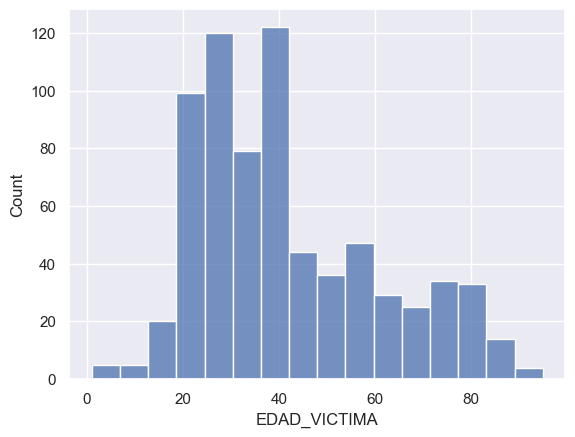

In [1322]:
# Graficamos el histograma de la edad de las victimas donde vemos una distribución
sns.histplot(data["EDAD_VICTIMA"])

Revisamos el sexo de las victimas donde vemos la distribución de cantidad de hombres y mujeres

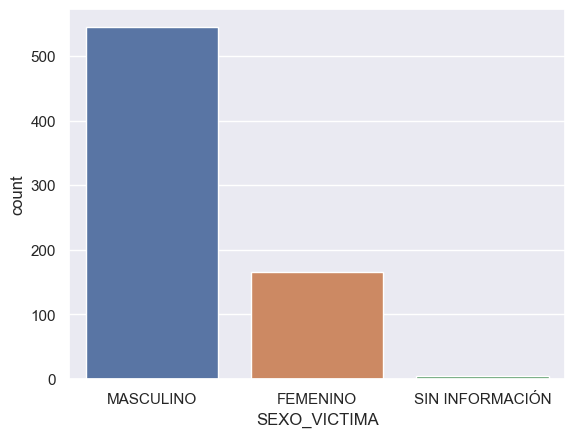

In [1323]:
sns.countplot(x = data['SEXO_VICTIMA'])
plt.show()

In [1324]:
data['SEXO_VICTIMA'].value_counts()

SEXO_VICTIMA
MASCULINO          545
FEMENINO           166
SIN INFORMACIÓN      5
Name: count, dtype: int64

Con la grafica anterior vemos como el 76% de las victimas fuero de sexo Masculino

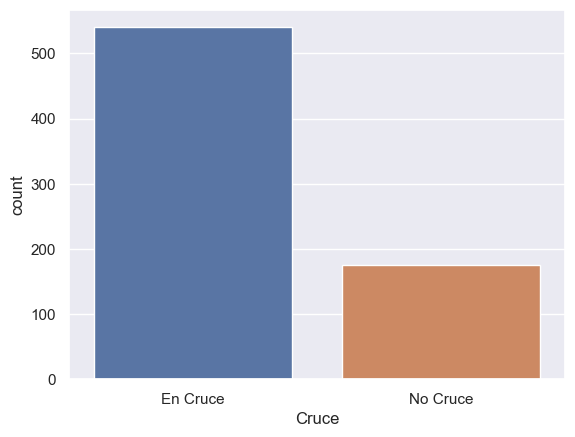

In [1325]:
# Graficamos el conteo de los resultados para la columna cruce
sns.countplot(x = data['Cruce'])
plt.show()

In [1326]:
En_cruce = round((data['Cruce'][data.Cruce == 'En Cruce'].count())/data['Cruce'].count() * 100, 1)
No_cruce = round((data['Cruce'][data.Cruce == 'No Cruce'].count())/data['Cruce'].count() * 100, 1)
print(f"El porcentaje de eventos ocurridos en un Cruce fue {En_cruce} %")
print(f"El porcentaje de eventos ocurridos en una Avenida Calle o Autopista fue {No_cruce} %")

El porcentaje de eventos ocurridos en un Cruce fue 75.4 %
El porcentaje de eventos ocurridos en una Avenida Calle o Autopista fue 24.6 %


Vemos que el 75% de los eventos ocurrieron en un cruce 

In [1327]:
# Filtramos la columna VICTIMA para ver las cuatro categorias que representan el 96% de los datos
data_victima_filtrada = data[data['VICTIMA'].isin(['MOTO', 'PEATON', 'AUTO', 'BICICLETA'])]

<Axes: xlabel='VICTIMA', ylabel='count'>

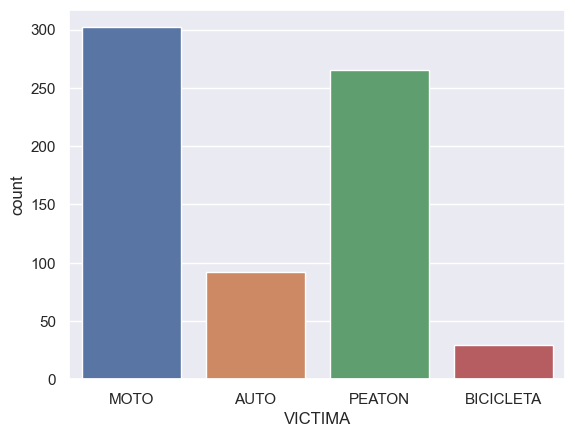

In [1328]:
sns.countplot(x= data_victima_filtrada['VICTIMA'])

In [1329]:
data_victima_filtrada['VICTIMA'].value_counts()

VICTIMA
MOTO         302
PEATON       265
AUTO          92
BICICLETA     29
Name: count, dtype: int64

El 86% de las victimas fueron actores Peatones y Motos

In [1330]:
data_victima_filtrada['ACUSADO'].value_counts()

ACUSADO
AUTO           204
PASAJEROS      173
CARGAS         143
OBJETO FIJO     66
MOTO            55
MULTIPLE        17
SIN ACUSADO     16
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64

In [1331]:
# Filtramos la columna ACUSADO para ver las cuatro categorias que representan el 96% de los datos
data_Acusado_filtrada = data[data['ACUSADO'].isin(['AUTO', 'PASAJEROS', 'CARGA', 'OBJETO FIJO', 'MOTO'])]

<Axes: xlabel='ACUSADO', ylabel='count'>

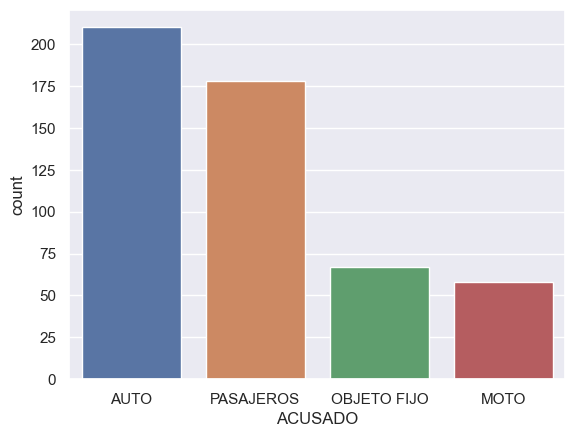

In [1332]:
# Graficamos el conteo de eventos por la variable acusados
sns.countplot(x= data_Acusado_filtrada['ACUSADO'])

El principales acusados que reunen el 52% de los eventos fueron autos y vehículos de pasajeros

## Detección y Tratamiento de Outliers

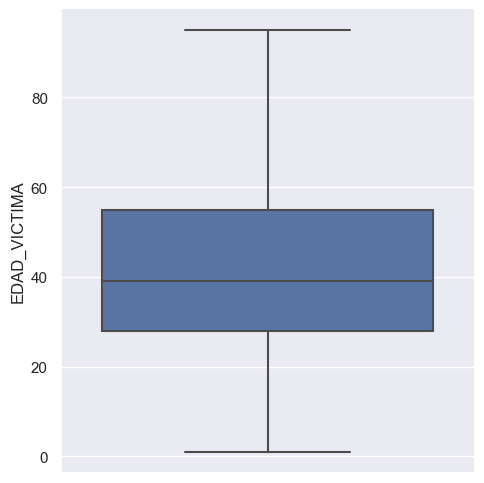

In [1339]:
# Revisamos la distribución de la data Edad pare detectar si tenemos valores atipicos
sns.catplot(y="EDAD_VICTIMA", kind='box' , data= data)

De acuerdo al grafico anterior vemos que no tenemos valores atípicos en la edad de las victimmas

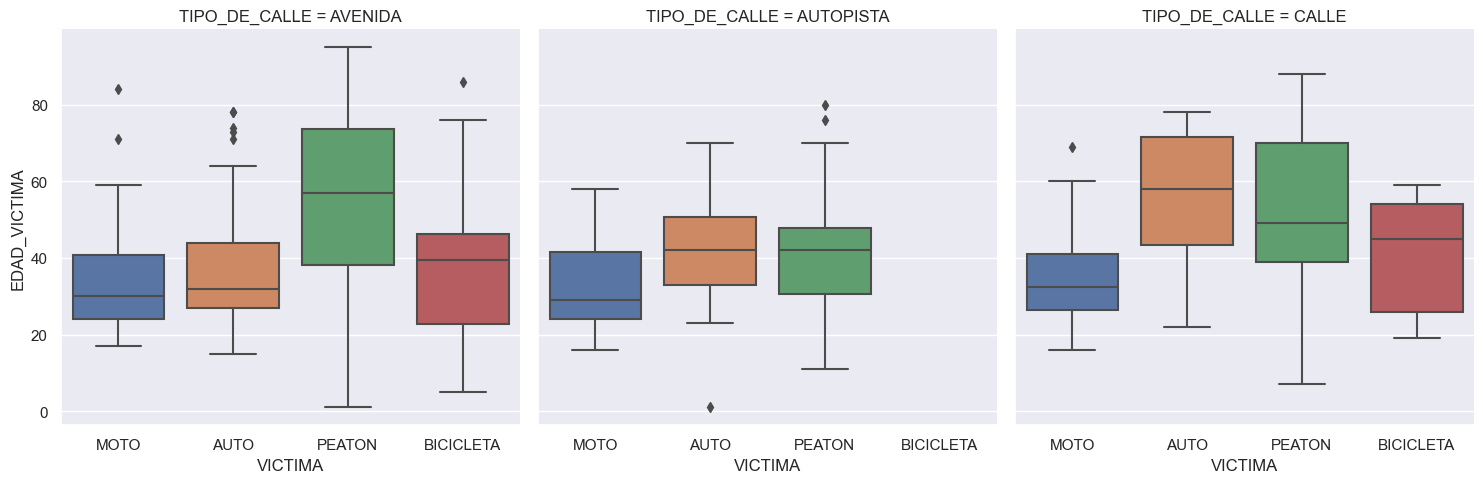

In [1333]:
# Revisamos las edades de las victimas con relacion a las variables categoricas tipo de calle y Victima
sns.catplot(x="VICTIMA", y="EDAD_VICTIMA", col="TIPO_DE_CALLE", kind='box' , data= data_victima_filtrada)

En el gráfico anterior podemos concluir que la mitad de las victimas cuyo suceso fue en una avenida fueron peatones que tenían un rango etario de entre 38 y 75 años

In [1342]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 716
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     716 non-null    object        
 1   N_VICTIMAS             716 non-null    int64         
 2   FECHA                  716 non-null    datetime64[ns]
 3   HORA                   716 non-null    object        
 4   HH                     716 non-null    float64       
 5   LUGAR_DEL_HECHO        716 non-null    object        
 6   TIPO_DE_CALLE          716 non-null    object        
 7   Calle                  716 non-null    object        
 8   Cruce                  716 non-null    object        
 9   Dirección Normalizada  716 non-null    object        
 10  COMUNA                 716 non-null    int64         
 11  Longitud               704 non-null    float64       
 12  Latitud                704 non-null    float64       
 13  VICTIMA   

In [1335]:
data['HORA'][459]

datetime.datetime(1900, 1, 14, 7, 12)

In [1340]:
data.isna().sum()

ID                        0
N_VICTIMAS                0
FECHA                     0
HORA                      0
HH                        0
LUGAR_DEL_HECHO           0
TIPO_DE_CALLE             0
Calle                     0
Cruce                     0
Dirección Normalizada     0
COMUNA                    0
Longitud                 12
Latitud                  12
VICTIMA                   0
ACUSADO                   0
ROL_VICTIMA               0
SEXO_VICTIMA              0
EDAD_VICTIMA              0
dtype: int64

In [1337]:
data.to_csv('data.csv', index=False)